Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-2-c78470e807ac>", line 90, in select_out
    return ot_file_out, ot_calc_method
NameError: name 'ot_file_out' is not defined


Output file is C:/Users/b2edhjhc/Desktop/MVN/HHC/overtopping/eurotop/100YR_Future2_Eurotop_MeanValue
Method chosen: Mean Value
Number of iterations to perform: 5
Levee Section: NO01
9.5 ft
10.0 ft
10.5 ft
11.0 ft
11.5 ft
12.0 ft
12.5 ft
13.0 ft
13.5 ft
14.0 ft
14.5 ft
15.0 ft
15.5 ft
16.0 ft
16.5 ft
Final Design Elevation = 16.5 ft


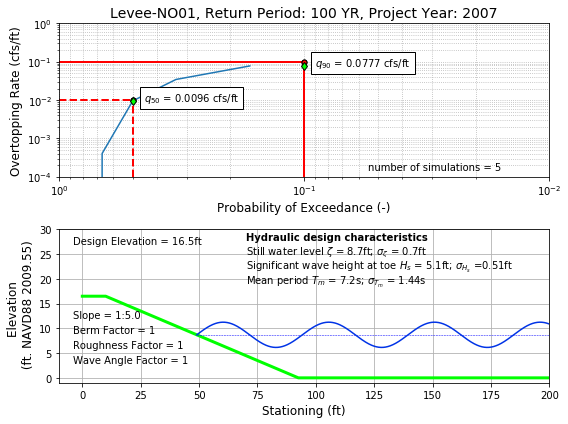

Levee Section: NO01
10.5 ft
11.0 ft
11.5 ft
12.0 ft
12.5 ft
13.0 ft
13.5 ft
14.0 ft
14.5 ft
15.0 ft
15.5 ft
16.0 ft
16.5 ft
17.0 ft
17.5 ft
18.0 ft
18.5 ft
19.0 ft
19.5 ft
Final Design Elevation = 19.5 ft


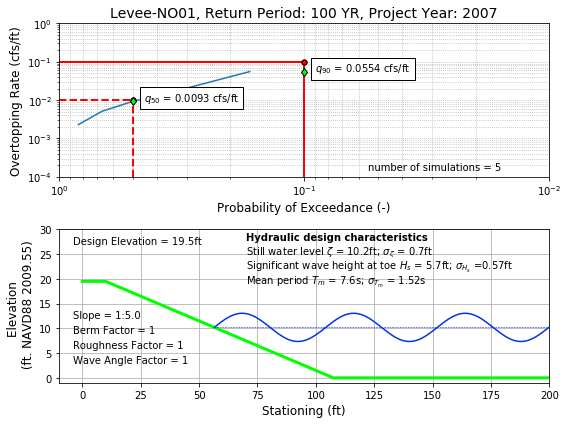

Levee Section: NO06-FW
10.5 ft
11.0 ft
11.5 ft
12.0 ft
12.5 ft
13.0 ft
13.5 ft
14.0 ft
14.5 ft
15.0 ft
Final Design Elevation = 15.0 ft


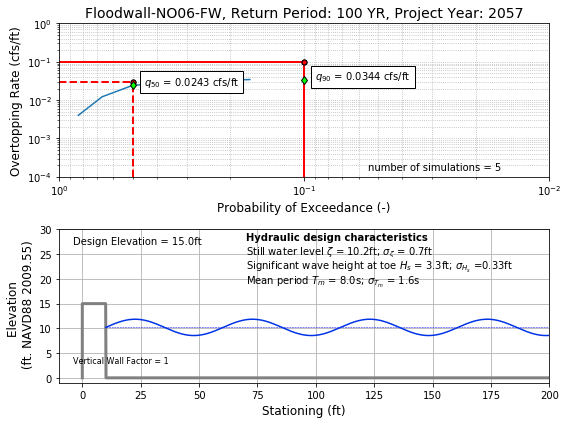

Levee Section: NO06-LT
10.5 ft
11.0 ft
11.5 ft
12.0 ft
12.5 ft
13.0 ft
13.5 ft
14.0 ft
14.5 ft
Final Design Elevation = 14.5 ft


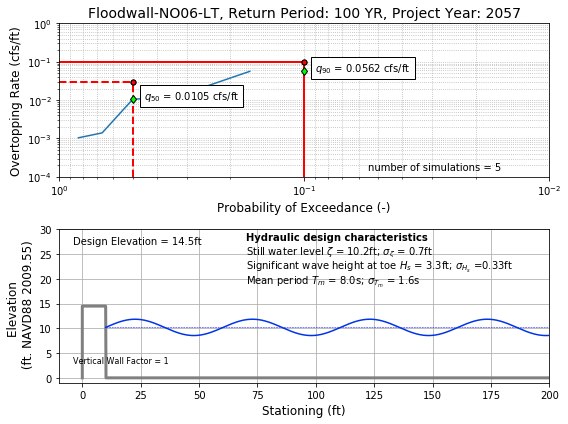

Saved!


C:\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [2]:
#This is the main program file for the HHC-Tools GUI#

#import background python modules#
import sys
import numpy as np
import tkinter as tk
from tkinter import ttk
import matplotlib
import matplotlib.pyplot as plt
from PIL import ImageTk, Image
#-------------------------#
m=tk.Tk()                            # Create instance for master window   
m.geometry("500x600")
m.title("HHC Tools")                 # Add a title for master window
tabControl = tk.ttk.Notebook(m)      # Create Tab Control using ttk notebook

# Specify font size for tabs
s = ttk.Style()
s.configure('TNotebook.Tab', font=('Arial',14), )
######################## Home Tab ############################
hometab = ttk.Frame(tabControl)            # Create overtopping tab instance 

# Add image to GUI
#imge1 = Image.open(".\MS_birdfoot.jpg")
#photo1 = ImageTk.PhotoImage(imge1)
#lab_home = tk.Label(hometab,image=photo1)
#lab_home.pack()

tabControl.add(hometab, text='Home')      # Add the tab
tabControl.pack(expand=1, fill="both")  # Pack to make visible

# Add title to top of GUI
title = tk.Label(hometab,text="HHC Tools",relief="solid",width=25,font=("arial",19,"bold"),bg='white')
title.place(x=75,y=50)

font0 = ('system',8)
font1 = ('system',10)
font2 = ('system',12)
font3 = ('system',14)
font4 = ('system',16)

######################## Overtopping Tool Begin ############################
sys.path.insert(1,'.\overtopping\eurotop')

import EurOtop_Overtopping as ot
# from App_Overtopping import m as ot
overtopping = ttk.Frame(tabControl)            # Create overtopping tab instance 

# Add image to page
imge = Image.open(".\overtopping\eurotop\overtopping-manual-eurotop-image-01.jpg")
photo = ImageTk.PhotoImage(imge)
lab = tk.Label(overtopping,image=photo)
lab.pack()

# Define type of input
var_method = tk.StringVar()
var_sim = tk.StringVar()
var_in = tk.StringVar()
var_out = tk.StringVar()
def select_in():
    global ot_file_in
    ot_file_in = var_in.get()
    ot_file_in = tk.filedialog.askopenfilename(initialdir = "/",
                                     title = "Select file",
                                     filetypes = (("XLS files","*.xls"),("CSV files","*.csv"),("all files","*.*")))
    return ot_file_in

    #if ot_file_in:
    #    print(f"Input file is {ot_file_in}")
    print(f"Input file is {ot_file_in}")
    #else:
    #    warnings.warn('Please select an input file')
def select_out():
    global ot_calc_method
    ot_calc_method = var_method.get() # calculation method
    global ot_file_out
    if ot_calc_method == 'Mean Value':
        ot_file_out =  tk.filedialog.asksaveasfilename(initialdir = "/", 
                                                 initialfile = "100YR_Future2_Eurotop_MeanValue",
                                                 title = "Select file",filetypes = (("CSV files","*.csv"),("all files","*.*")))
        print(f"Output file is {ot_file_out}")
    elif ot_calc_method == 'Design & Assessment':
        ot_file_out =  tk.filedialog.asksaveasfilename(initialdir = "/", 
                                                 initialfile = "100YR_Future2_Eurotop_DesignAssess", defaultextension = ".csv",title = "Select file",filetypes = (("CSV files","*.csv"),("all files","*.*")))
        print(f"Output file is {ot_file_out}")
    else:
        tk.messagebox.showinfo("Select output file",
                                    "Please select a calculation method.")
        #warnings.warn('Please select a calculation method')#ot_file_out =  filedialog.asksaveasfilename(initialdir = "/", initialfile = "100YR_Future2_Eurotop_DesignAssess", defaultextension = ".csv",title = "Select file",filetypes = (("CSV files","*.csv"),("all files","*.*")))
    return ot_file_out, ot_calc_method
    
def select_run(): # Options for run simulations button
    ot_calc_method = var_method.get() # calculation method
    global ot_numsim
    ot_numsim = var_sim.get() # number of iterations
        
    try: ot_file_in
    except NameError: tk.messagebox.showinfo("Run Calculation","Please select an input file.")#ot_file_in = '' # None
    try: ot_file_out
    except NameError: tk.messagebox.showinfo("Run Calculation","Please select an output file.")#ot_file_out = '' # None
        
    if (ot_calc_method == "Mean Value" or ot_calc_method == "Design & Assessment") and (ot_file_in != "" and ot_file_in != None) and (ot_file_out != "" and ot_file_out != None):
#     if (ot_calc_method == "Mean Value" or ot_calc_method == "Design & Assessment") and ot_file_in and ot_file_out:
        print(f"Method chosen: {ot_calc_method}")
        print(f"Number of iterations to perform: {ot_numsim}")
        tk.messagebox.showinfo("Overtopping Calculation Progress",
                                    "Program is running!")
#         m.destroy() # closes window
        # use the overtopping function
        ot.OT(ot_numsim,ot_calc_method,ot_file_in,ot_file_out)
        
    elif ot_calc_method != 'Mean Value' and  ot_calc_method !='Design & Assessment':
        tk.messagebox.showinfo("Run Calculation",
                                    "Please select a calculation method.")
    return ot_numsim


# Create drop down menu for calculation method (mean value vs. design/assess)
# Label for dropdown menu
label_1 = tk.Label(overtopping,text="Calculation Method:",width=20,font=("arial",12,"bold"),bg='white')
label_1.place(x=50,y=374)
# Dropdown menu
list1 = ['Mean Value', 'Design & Assessment']
droplist = tk.OptionMenu(overtopping,var_method,*list1)
var_method.set("Select Method")
droplist.config(width=17,font=("arial",12))
droplist.place(x=270,y=370)

# Enter text for number of iterations
label_2 = tk.Label(overtopping,text="Number of Iterations:",width=20,font=("arial",12,"bold"),bg='white')
label_2.place(x=50,y=410)
entry_2 = tk.Entry(overtopping,textvar=var_sim,width=22,font=("arial",12))
entry_2.place(x=268, y=411)
entry_2.insert(tk.END,20000)

# Create button to choose input file
#b_in = Button(m,text="Input File",width=12,bg=((16,24,31)),fg=(211,188,141) )#  ,command=select_in)
b_in = tk.Button(overtopping,
                 text="Select Input File",
                 width=19,
                 bg="#101820",
                 fg="#D3BC8D",
                 font=("arial",12,"bold"),
                 command=select_in)

b_in.place(x=50,y=500)

# Create button to choose where to save file
b_out = tk.Button(overtopping,
                  text="Select Output Name",
                  width=19,
                  bg="#101820",
                  fg="#D3BC8D",
                  font=("arial",12,"bold"),
                  command=select_out)

b_out.place(x=269,y=500)


# # Add progress bar
# prog_it = Progressbar(m, orient = HORIZONTAL, length = 100, mode = 'determinate') # progress bar for iteration number 
# prog_it.pack() # iteration number progress bar


# Create button to run simulations
b_run = tk.Button(overtopping,
                  text="Run Simulations",
                  width=15,
                  bg="#101820",
                  fg="#D3BC8D",
                  font=("arial",14,"bold"),
                  command=select_run)

b_run.place(x=175,y=550)

# Add title to top of page
title = tk.Label(overtopping,
                 text="EurOtop Overtopping (2018)",
                 relief="solid",
                 width=25,
                 font=("arial",19,"bold"),
                 bg='white')

title.place(x=75,y=50)


tabControl.add(overtopping, text='Overtopping')      # Add the title to the tab 
tabControl.pack(expand=1, fill="both")   # Pack to make visible  
# button_ot = tk.Button(overtopping, text='Overtopping', width=25, command=open_ot)#m.destroy) # adding button to overtopping tab
# button_ot.pack()




#Overtopping Tool end#

#Rainfall Tool Begin#

sys.path.insert(2,'.\precipitation\predicted')
import rainfall_pred1 as prcp
rainfall = ttk.Frame(tabControl)            # Create rainfall tab instance 
tabControl.add(rainfall, text='rainfall')      # Add the tab
tabControl.pack(expand=1, fill="both")  # Pack to make visible

img = Image.open(".\\images\\rainfall.png").resize((500,600))
img = ImageTk.PhotoImage(img)
background = tk.Label(rainfall, image=img)
background.place(x=0,y=0,relheight=1., relwidth=1.)
background.lower()

figure_window = tk.Canvas(master=rainfall)
figure_window.place(relx=0.05,rely=0.05,relheight=0.45, relwidth=0.90)

latitude_label=tk.StringVar()
latitude_label.set("Latitude:   ")

longitude_label=tk.StringVar()
longitude_label.set("Longitude:")

latitude_label=tk.Label(rainfall, 
                        textvariable=latitude_label, 
                        height=1, 
                        font=font2)

latitude_label.place(relx = 0.05, rely = 0.55)

longitude_label=tk.Label(rainfall, 
                         textvariable=longitude_label,
                         height=1,
                         font=font2)

longitude_label.place(relx = 0.05, rely = 0.65)

latitude = tk.Entry(rainfall,textvariable=None, font=font2, width=17)
longitude = tk.Entry(rainfall,textvariable=None, font=font2, width=17)

latitude.place(relx = 0.3, rely = 0.55)
longitude.place(relx = 0.3, rely = 0.65)

latitude.lift()
longitude.lift()

durations=['5-min',
           '10-min',
           '15-min',
           '30-min',
           '60-min',
           '2-hr',
           '3-hr',
           '6-hr',
           '12-hr',
           '24-hr',
           '2-day',
           '3-day',
           '4-day',
           '7-day',
           '10-day',
           '20-day',
           '30-day',
           '45-day',
           '60-day']

annual_return_intervals=['1',
                         '2',
                         '5',
                         '10',
                         '25',
                         '50',
                         '100',
                         '200',
                         '500',
                         '1000',
                         'all']

duration_variable = tk.StringVar(rainfall)
duration_variable.set('Duration') # default value
duration_menu = tk.OptionMenu(rainfall, duration_variable, *durations)
duration_menu.config(width=10, font=font0, height=1)
duration_menu.place(relx=0.7, rely =0.55)

annual_return_interval_variable = tk.StringVar(rainfall)
annual_return_interval_variable.set('Return')
annual_return_interval_menu = tk.OptionMenu(rainfall, annual_return_interval_variable, *annual_return_intervals)
annual_return_interval_menu.config(width=10, font=font0, height=1)
annual_return_interval_menu.place(relx=0.7, rely =0.65)

def precipitation(a,b,c,d):

    matplotlib.use('TkAgg')
    from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
    prcp.run_precip(a,b,c,d)
    fig = matplotlib.figure.Figure(figsize=(10, 6), dpi=100)
    mins = [i * 5 for i in prcp.hrs]
    if c == 'all':
        for i in range(len(annual_return_intervals)-2):
            fig.add_subplot(111,
                            xlabel="minutes",
                            ylabel="inches").plot(mins,prcp.list_return[i])
    else:
        fig.add_subplot(111,
                        xlabel="minutes",
                        ylabel="inches").plot(mins,prcp.list_return)
        #fig.add_subplot(111).bar(prcp.hrs,prcp.list_return)
    fig.suptitle("Hyteograph")
    fig.tight_layout(pad=7)
    canvas = FigureCanvasTkAgg(fig, master=rainfall)  # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().place(relx=0.05,rely=0.05,relheight=0.45, relwidth=0.90)

precip_run_button = tk.Button(rainfall, 
                    text='Get Predicted Rainfall', font=font1,
                    width=25, 
                    command=lambda : precipitation(float(latitude.get()),
                                                   float(longitude.get()),
                                                   annual_return_interval_variable.get(),
                                                   duration_variable.get())) # adding button to rainfall tab
precip_run_button.place(relx=0.275,rely=0.85)

#Rainfall Tool end#

m.mainloop() # Start GUI
